# Assignment 1: k-nearest neighbors (100 points)

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

==> *Write*
* name: Abdul Rehman
* *matr. nr.* 3440146
* *study program* M.Sc. INFOTECH
* *B.Sc./M.Sc.*

*of all assignment group participants here.* (double klick here to edit)*

In [193]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np


def load_wine_dataset():
    from sklearn import datasets
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    return X, y
    
X, y = load_wine_dataset()
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Task 1: Visualization and Preprocessing (25 points)

1) *(5 Points)* Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: [http://archive.ics.uci.edu/ml/datasets/Wine).


==> *Write your response here.* (double klick here to edit)
The dataset contains different types of wines grown in the same region of ITALY. However they derived from three  different cultivars. Its clear from the description that we have three diferent target categories or classes.
There are 13 different input features for each class on which we decide each class after the training of data. Actually these feature belongs to certain chemicals and we also call it dimensions. 
These 13 features are following. 

    1) Alcohol
	2) Malic acid
	3) Ash
	4) Alcalinity of ash  
	5) Magnesium
	6) Total phenols
	7) Flavanoids
	8) Nonflavanoid phenols
	9) Proanthocyanins
	10)Color intensity
	11)Hue
	12)OD280/OD315 of diluted wines
	13)Proline

2) *(5 Points)* Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [96]:
# Implement your solution here.
# Number of samples
num_sample = X.shape[0]
print("Number of Samples are: {}".format(num_sample))

# Number of samples per Class
sample_C0, sample_C1, sample_C2 = np.bincount(y)
print("Number of Samples in Class 0: {}".format(sample_C0))
print("Number of Samples in Class 1: {}".format(sample_C1))
print("Number of Samples in Class 2: {}".format(sample_C2))

# Mean and Mean and standard deviation for each input feature
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
num_features = X.shape[1]
features_name = ["alcohol", "malic acid", "ash", "ash alcalinity", "magnesium", "total phenols", "flavanoids", "nonflavanoid phenols", "proanthocyanins", "color intensity", "hue", "OD280/OD315 of diluted wines", "proline"]

for i in range(num_features):
    print("Feature Name: {}; Mean: {:.3f} and standard deviation: {:.3f}".format(features_name[i], mean[i], std_dev[i]))


Number of Samples are: 178
Number of Samples in Class 0: 59
Number of Samples in Class 1: 71
Number of Samples in Class 2: 48
Feature Name: alcohol; Mean: 13.001 and standard deviation: 0.810
Feature Name: malic acid; Mean: 2.336 and standard deviation: 1.114
Feature Name: ash; Mean: 2.367 and standard deviation: 0.274
Feature Name: ash alcalinity; Mean: 19.495 and standard deviation: 3.330
Feature Name: magnesium; Mean: 99.742 and standard deviation: 14.242
Feature Name: total phenols; Mean: 2.295 and standard deviation: 0.624
Feature Name: flavanoids; Mean: 2.029 and standard deviation: 0.996
Feature Name: nonflavanoid phenols; Mean: 0.362 and standard deviation: 0.124
Feature Name: proanthocyanins; Mean: 1.591 and standard deviation: 0.571
Feature Name: color intensity; Mean: 5.058 and standard deviation: 2.312
Feature Name: hue; Mean: 0.957 and standard deviation: 0.228
Feature Name: OD280/OD315 of diluted wines; Mean: 2.612 and standard deviation: 0.708
Feature Name: proline; Mean

3) *(5 Points)* Visualize the variables *alcohol* and *magnesium* in a scatter plot (*alcohol* on the x-axis, *magnesium* on the y-axis). Color each point of the plot according to its class.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


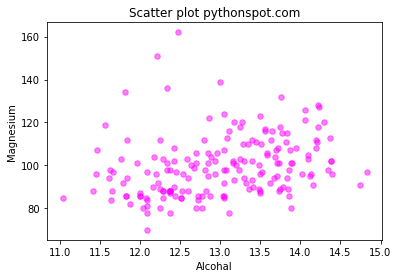

In [78]:
# Implement your solution here.
alcohal = X[:,0]
magnesium = X[:,4]
colors = (1,0,1)
groups = (0, 1, 2)
area = 30

# Plot
plt.scatter(alcohal, magnesium, s=area, c=colors, alpha=0.5, label=groups)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('Alcohal')
plt.ylabel('Magnesium')
plt.show()

4) *(5 Points)* Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [210]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    data = np.column_stack((X,y))
    size_col = data.shape[1]
    np.random.shuffle(data)

    temp_y = data[:, 13]
    new_y = np.array(temp_y , dtype=y.dtype)

    new_X = data[:,:13]

    train_sample = int(num_sample * 0.7)
    test_sample = int(num_sample * 0.3)

    X_train = new_X[0:train_sample, :]
    y_train = new_y[0:train_sample]

    X_test = new_X[train_sample:num_sample, :]
    y_test = new_y[train_sample:num_sample]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)

assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

5) *(5 Points)* kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [238]:
# Implement your solution here
x_min = X_train.min()
x_max = X_train.max()
norm_X_train = (X_train - x_min)/(x_max - x_min)
norm_X_test = (X_test - x_min)/(x_max - x_min)

## Task 2: k-nearest neighbors (50 Points)
*Choose classes randomly if weights are equal for multiple classes*

**For B.Sc. Data Science:**  

Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighbors`. 

Use Euclidean distance to determine the nearest neighbors.
You can ignore the optional parameter `weights`, which is provided as a field in the kNN class.

**For all students other than B.Sc. Data Science:**

Implement the kNN algorithm with uniform and distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighbors`.

The parameter `weights` will either contain the string `uniform` or `distance`. 
- If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. 
- If the value is a `distance`, the classifier should use the Euclidean distance for determining neares neighbors and perform distance-weighted classification.

In [323]:
class KNearestNeighbors(object):
    def __init__(self, k, weights='uniform'):
        self.k = k
        self.weights = weights
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        # Implement your solution here.
        if self.weights == 'uniform':
            dist = euclidean_distance
        else:
            dist = self.weights
            
        # Compute pairwise distances between inputs and training samples.
        pw_distances = np.array([[dist(x1, x2) for x1 in X] for x2 in self.X])
        # Identify k nearest neighbors for each input sample.
        neighbors = np.argsort(pw_distances, axis=0)[:self.k].T
        labels = []
        for idx, nb in enumerate(neighbors):
            candidate_labels = np.unique(y_train[nb])
            candidate_weights = []

            for candidate in candidate_labels:
                if self.weights == 'uniform': # uniform weights
                    candidate_weight = np.sum(self.y[nb] == candidate)
                else: # distance-weighted
                    weights = 1.0/pw_distances[nb, idx][self.y[nb] == candidate]
                    # If distance is 0, the corresponding weight will be infinity,
                    # which results in us just looking up the correct label or performing 1-NN.
                    candidate_weight = np.sum(weights)
                
                candidate_weights.append(candidate_weight)
            
            # Select the class label with highest weight.
            label_idx = np.argmax(candidate_weights)
            label = candidate_labels[label_idx]
            labels.append(label)
        
        return np.array(labels)
        

    
def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))

## Task 3: Evaluation (25 Points)

1) *(10 Points)* Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score. It is advisable to implement a function for the confusion matrix and reuse it.

In [399]:
def precision(y_pred, y_true):
    # Implement your solution here.
    # precision = tp / (tp + fp)
    
    #g_truth = set(y_pred).union(set(y_true))
    g_truth = np.union1d(np.unique(y_pred),np.unique(y_true))
    print(len(g_truth))
    precision_new = list()
    for classes in g_truth:        
        t_pos, t_neg, f_pos, f_neg = calculate_confusion_matrix(y_pred, y_true, classes)
        if((t_pos + f_pos) != 0):
            precision_temp = t_pos / float(t_pos + f_pos)
        else:        
            precision_temp = 0
        precision_new.append(precision_temp)
    print(precision_new)
    print(np.mean(precision_new))
    return np.mean(precision_new)

def recall(y_pred, y_true):
    # Implement your solution here.
    print("Recall")
    g_truth = np.union1d(np.unique(y_pred),np.unique(y_true))
    print(len(g_truth))
    recall_new = list()
    for classes in g_truth:        
        t_pos, t_neg, f_pos, f_neg = calculate_confusion_matrix(y_pred, y_true, classes)
        try:
            recall_temp = t_pos / float(t_pos + f_neg)
        except:
            recall_temp = 0
        recall_new.append(recall_temp)
    print(recall_new)
    print(np.mean(recall_new))

def f1score(y_pred, y_true):
    # Implement your solution here.
    print("test")

def calculate_confusion_matrix(y_pred, y_true, groud_truth):
#function for the calculation of confusion matrix
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_pos = 0
    true_pos = sum(1 for y_p,y_t in zip(y_pred, y_true) if y_p==y_t and groud_truth==y_t)
    true_neg = sum(1 for y_p,y_t in zip(y_pred, y_true) if y_p==y_t and groud_truth!=y_t)
    false_pos = sum(1 for y_p,y_t in zip(y_pred, y_true) if y_p!=y_t and groud_truth==y_t)
    false_neg = sum(1 for y_p,y_t in zip(y_pred, y_true) if y_p!=y_t and groud_truth!=y_t)

    return true_pos,true_neg,false_pos,false_neg
#gold = [1] * 20 + [0] * 10 + [2] * 15
#predicted = [1] * 14 + [0] * 21 + [2] * 10
gold = [1] + [0] * 9
predicted = [1] * 10
precision(predicted, gold)
recall(predicted, gold)

2
[0.0, 1.0]
0.5
Recall
2
[1.0, 1.0]
1.0


2) *(10 Points)* Evaluate the performance of kNN with uniform weighting on the Wine dataset for `k=1,5,9`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Visualize the performance in a plot, what do you observe?

**For all students other than B.Sc. Data Science:** 

Also evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

In [345]:
# Implement your solution here.
gold = [1] + [0] * 9
predicted = [1] * 10
label1 = [1] * 5
label2 = [0] * 5
label = np.union1d(label, label2)
true_pos = sum(1 for p,g in zip(predicted, gold) if p==g and label.any()==g)
true_neg = sum(1 for p,g in zip(predicted, gold) if p==g and label.any()!=g)
false_pos = sum(1 for p,g in zip(predicted, gold) if p!=g and label.any()!=g)
false_neg = sum(1 for p,g in zip(predicted, gold) if p!=g and label.any()==g)
try:
    recall = true_pos / float(true_pos + false_neg)
except:
    recall = 0
try:
    precision = true_pos / float(true_pos + false_pos)
except:
    precision = 0
try:
    fscore = 2*precision*recall / (precision + recall)
except:
    fscore = 0
try:
    accuracy = (true_pos + true_neg) / float(len(gold))
except:
    accuracy = 0

print(recall)
print(precision)
print(fscore)



1.0
0.1
0.18181818181818182


==> *Write your observations here and report your results.* (double klick here to edit)

3) *(5 Points)* Explain why kNN with `k=1` achieves perfect results on the training data. Why is it not the best model?

==> *Write your response here.* (double klick here to edit)